In [829]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import math


px0=100; 
y0=0.02;


Nb=52;

tfin=Nb*(2*np.pi*np.sqrt(2*px0)); 
tstep=0.01;

Nt=np.int_(np.floor(tfin/tstep));

abeta=px0*y0/np.sqrt(2*px0); 
print("abeta is "+str(abeta)+"\n");
wr=2*px0*px0/np.sqrt(2*px0); 
print("wr is "+str(wr)+"\n   or "+str(wr*1.24/0.8)+" eV\n");
wc=3*abeta*px0*px0/np.sqrt(2*px0); 
print("wc is "+str(wc)+"\n   or "+str(wc*1.24/0.8)+" eV\n");
print("Nt is " +str(Nt)+"\n");
print("dt is " +str(tstep)+"\n");
def SaveAsH5(rank):
    
    tt = np.arange(Nt)*tstep
    
    kb = 1/np.sqrt(2*px0)
    vx0 = px0/math.sqrt(1+px0*px0);
    
    py = kb*y0*np.cos(kb*tt)*px0
    yy =    y0*np.sin(kb*tt)
    
    px = np.sqrt(px0*px0-1-py*py);
    xx = np.zeros(Nt)
    
    for i in np.arange(1,Nt,1):
        xx[i]=xx[i-1]+(px[i]+px[i-1])/2/px0*tstep
    
    pz = np.zeros(Nt)
    zz = np.zeros(Nt)
    
    
    f = h5.File('Traj_%d_.h5'%rank,'w')
    for p in np.arange(1):
        grp = f.create_group('%d'%p)
        dset = grp.create_dataset("xx", (Nt,),data=xx)
        dset = grp.create_dataset("yy", (Nt,),data=yy)
        dset = grp.create_dataset("zz", (Nt,),data=zz)
        dset = grp.create_dataset("px", (Nt,),data=px)
        dset = grp.create_dataset("py", (Nt,),data=py)
        dset = grp.create_dataset("pz", (Nt,),data=pz)
        dset = grp.create_dataset("weight",(1,),data=1.0) #how many real unit charges it represents 
        dset = grp.create_dataset("start", (1,),data=0) # starting time of trajectory
         
    f.close()
    
    
for i in range(4):
     SaveAsH5(i)

abeta is 0.1414213562373095

wr is 1414.213562373095
   or 2192.0310216782973 eV

wc is 299.99999999999994
   or 464.9999999999999 eV

Nt is 462059

dt is 0.01



In [830]:
%%capture
rm Synchrotron_0000* ; make; mpiexec -n 4 SIRC 

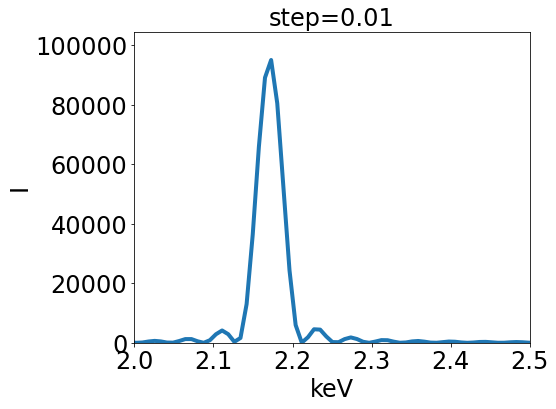

In [834]:
from scipy import special

filename = 'Synchrotron_00004_.h5'
hf = h5.File(filename, 'r')
Ax = np.square(np.array(hf['Ax_R']))+np.square(np.array(hf['Ax_I']))
Ay = np.square(np.array(hf['Ay_R']))+np.square(np.array(hf['Ay_I']))
Az = np.square(np.array(hf['Az_R']))+np.square(np.array(hf['Az_I']))
eng = np.array(hf['Energy[eV]'])
I = Ay+Ax+Az


fig, ax = plt.subplots()

ax.plot(eng/1000, (I[:,0,0,0]), linewidth=4.0)

    

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(24)
ax.set_xlabel('keV', fontsize=24)
ax.set_ylabel('I', fontsize=24)
fig.tight_layout()
fig.set_size_inches(8, 6)
ax.set(ylim=(0,np.max(I)*1.1),xlim=(2,2.5))
# ax.set(ylim=(100,np.max(I)*2.1))
ax.set_title('step=%s'%tstep, fontsize=24)
ax.patch.set_alpha(0.0)
# ax.set_yscale('log')
plt.show()

<ipython-input-828-ee18f84fe208>:24: RuntimeWarning: invalid value encountered in multiply
  didw = xi*xi*np.square(special.kv(2/3,xi));


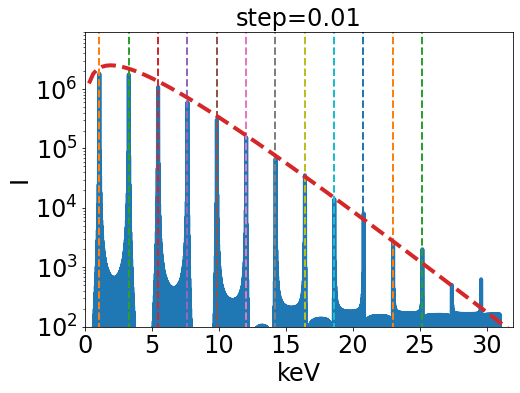

In [828]:
from scipy import special

filename = 'Synchrotron_00004_.h5'
hf = h5.File(filename, 'r')
Ax = np.square(np.array(hf['Ax_R']))+np.square(np.array(hf['Ax_I']))
Ay = np.square(np.array(hf['Ay_R']))+np.square(np.array(hf['Ay_I']))
Az = np.square(np.array(hf['Az_R']))+np.square(np.array(hf['Az_I']))
eng = np.array(hf['Energy[eV]'])
I = Ay+Ax+Az


fig, ax = plt.subplots()

ax.plot(eng/1000, (I[:,0,0,0]), linewidth=4.0)

for i in np.arange(1,25,2):
    wn=i*2*px0*px0/(1+abeta*abeta/2)*kb/1000*1.239/0.8
    ax.plot(np.array([wn,wn]), np.array([0,2e7]),'--',linewidth=2.0)

w = np.arange(100)*0.32;
xi = (w/(wc/1000*1.24/0.8));


didw = xi*xi*np.square(special.kv(2/3,xi));
    
ax.plot(w, 6.8e6*didw,'--', linewidth=4.0)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(24)
ax.set_xlabel('keV', fontsize=24)
ax.set_ylabel('I', fontsize=24)
fig.tight_layout()
fig.set_size_inches(8, 6)
ax.set(ylim=(0,np.max(I)*1.1),xlim=(0,32))
ax.set(ylim=(100,np.max(I)*5.))
ax.set_title('step=%s'%tstep, fontsize=24)
ax.patch.set_alpha(0.0)
ax.set_yscale('log')
plt.show()

In [702]:
didw

array([           nan, 1.75779413e-01, 2.58149662e-01, 3.10015986e-01,
       3.42140750e-01, 3.60158406e-01, 3.67754712e-01, 3.67579612e-01,
       3.61628420e-01, 3.51439935e-01, 3.38215482e-01, 3.22897889e-01,
       3.06227571e-01, 2.88784279e-01, 2.71019171e-01, 2.53280008e-01,
       2.35831246e-01, 2.18870229e-01, 2.02540322e-01, 1.86941618e-01,
       1.72139690e-01, 1.58172747e-01, 1.45057492e-01, 1.32793910e-01,
       1.21369176e-01, 1.10760835e-01, 1.00939379e-01, 9.18703272e-02,
       8.35158983e-02, 7.58363386e-02, 6.87909742e-02, 6.23390313e-02,
       5.64402684e-02, 5.10554546e-02, 4.61467218e-02, 4.16778153e-02,
       3.76142630e-02, 3.39234783e-02, 3.05748123e-02, 2.75395637e-02,
       2.47909591e-02, 2.23041075e-02, 2.00559388e-02, 1.80251281e-02,
       1.61920125e-02, 1.45385014e-02, 1.30479849e-02, 1.17052405e-02,
       1.04963411e-02, 9.40856482e-03, 8.43030723e-03, 7.55099770e-03,
       6.76101920e-03, 6.05163244e-03, 5.41490443e-03, 4.84364141e-03,
      

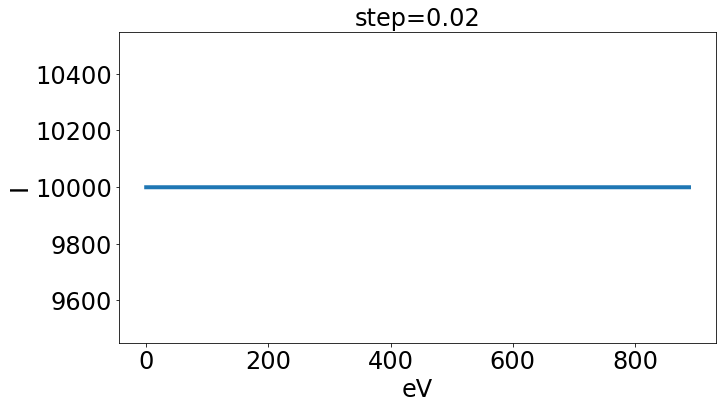

In [636]:
tt = np.arange(Nt)*tstep
    
kb = 1/np.sqrt(2*px0)
vx0 = px0/math.sqrt(1+px0*px0);
    
    
py = kb*y0*np.cos(kb*tt)*px0
yy =    y0*np.sin(kb*tt)
    
px = np.sqrt(px0*px0-1-py*py);
xx = np.zeros(Nt)
    
for i in np.arange(1,Nt,1):
    xx[i]=xx[i-1]+(px[i]+px[i-1])/2/px0*tstep
    
pz = np.zeros(Nt)
zz = np.zeros(Nt)
    
fig, ax = plt.subplots()

ax.plot(tt, px*px+py*py, linewidth=4.0)



for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(24)
ax.set_xlabel('eV', fontsize=24)
ax.set_ylabel('I', fontsize=24)
fig.tight_layout()
fig.set_size_inches(12, 6)
# ax.set(ylim=(0,np.max(I)*1.1),xlim=(0,2000))
ax.set_title('step=%s'%tstep, fontsize=24)
# ax.patch.set_alpha(0.0)
# ax.set_yscale('log')
plt.show()